In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('saved_model/my_modelBB50')

# Check its architecture
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_16 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_17 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_18 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_19 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                

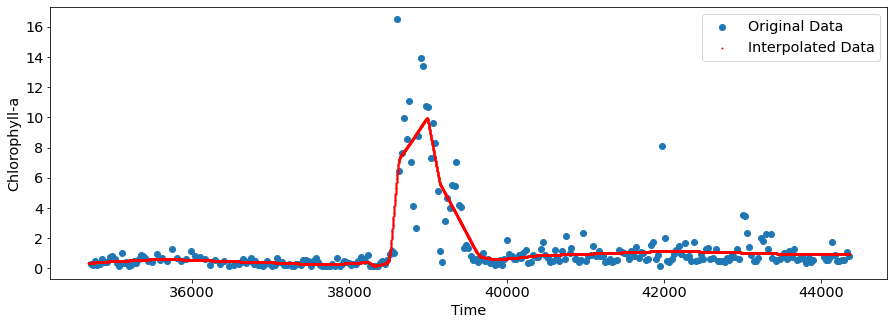

313/313 [==============================] - 0s 321us/step - loss: 2.8165e-16
['loss']


array([[0.02836014],
       [0.02930738],
       [0.03003233],
       [0.02978149],
       [0.02913271],
       [0.02847333],
       [0.02784582],
       [0.02719706],
       [0.02654829],
       [0.02589954],
       [0.02525076],
       [0.02459135],
       [0.02396387],
       [0.02331511],
       [0.02266635],
       [0.02196539],
       [0.02125949],
       [0.02054202],
       [0.04906036],
       [0.0489626 ],
       [0.04890982]], dtype=float32)

In [2]:
df = pd.read_csv("C:/Users/yanzh/Desktop/chloro_data/BB50.csv")
time = df['time'].values
chlorophylla = df['chlorophylla'].values
df
#Transform the normalized scale to real scale
chlorophylla_min = 0.13
chlorophylla_max = 16.48
time_min = 34710.00   
time_max = 44356.41    

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(chlorophylla_max - chlorophylla_min) + chlorophylla_min
# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, chlorophylla*(chlorophylla_max - chlorophylla_min) + chlorophylla_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('Chlorophyll-a')
plt.legend()
plt.show()
model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)
interpolation = model.predict([0.078682095
,0.084798358
,0.097445546
,0.10376914
,0.110092734
,0.116519993
,0.122636256
,0.12895985
,0.135283444
,0.141607038
,0.147930632
,0.154357891
,0.160474154
,0.166797748
,0.173121342
,0.179444936
,0.18576853
,0.19219579
,0.955692008
,0.958801973
,0.962015602
])
interpolation